In [25]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score

In [11]:
df = pd.read_csv('train.txt', header=None, names=['Temperature', 'Ice Cream'], sep=r'\s+')
df.head().round(2)

,Temperature,Ice Cream
0,0.00,4.46
1,0.04,3.30
2,0.08,3.60
3,0.11,3.40
4,0.15,4.57


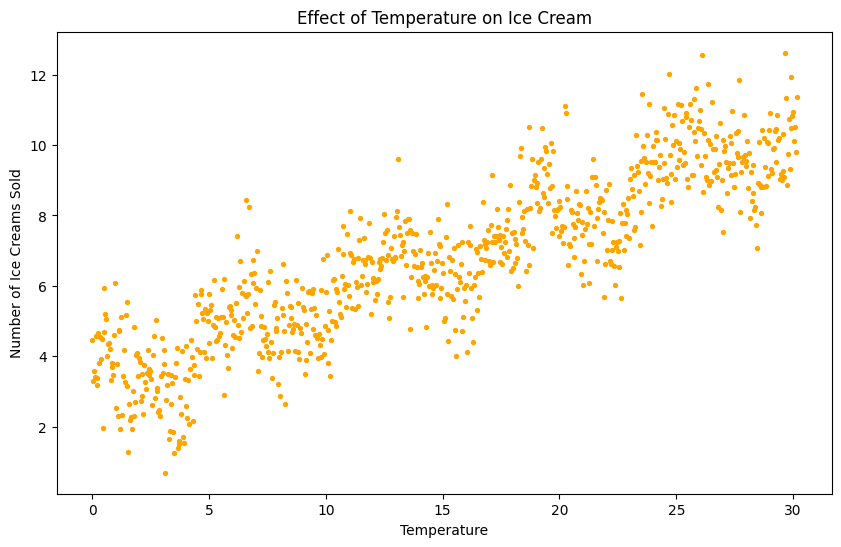

In [12]:
plt.figure(figsize=(10,6))
plt.title('Effect of Temperature on Ice Cream')
plt.scatter(x=df['Temperature'], y=df['Ice Cream'], c='orange', s=8)
plt.xlabel('Temperature')
plt.ylabel('Number of Ice Creams Sold')
plt.show()

In [13]:
model = LinearRegression()

# Converting Temperature column to DataFrame to fix reshaping issue in model.fit
X_train = pd.DataFrame(df['Temperature'])
y_train = df['Ice Cream']

model.fit(X=X_train, y=y_train)

beta_0_hat = model.intercept_
beta_1_hat = model.coef_

print(f"Estimate for β̂0: {beta_0_hat}")
print(f"Estimate for β̂1: {beta_1_hat[0]}")

Estimate for β̂0: 3.191037800253056
Estimate for β̂1: 0.238397630459365


In [33]:
X_train = sm.add_constant(X_train)

ice_creams = sm.OLS(y_train, X_train).fit()
results = ice_creams.summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:              Ice Cream   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     2840.
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          4.30e-265
Time:                        15:05:07   Log-Likelihood:                -1212.4
No. Observations:                 800   AIC:                             2429.
Df Residuals:                     798   BIC:                             2438.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.1910      0.078     40.962      

In [23]:
non_linear_df = df.copy()
epsilon = 1e-8
non_linear_df['cos(x)'] = np.cos(df.iloc[:,0])
non_linear_df['log(x)'] = np.log(df.iloc[:,0] + epsilon)
non_linear_df['cos(4x)'] = np.cos(4 * df.iloc[:,0])
non_linear_df['sin(3x)'] = np.sin(3 * df.iloc[:,0])
non_linear_df['sin(5x)'] = np.sin(5 * df.iloc[:,0])
non_linear_df['sin(2x)cos(2x)'] = np.sin(2 * df.iloc[:,0]) * np.cos(2 * df.iloc[:,0])

non_linear_df = non_linear_df[[col for col in non_linear_df.columns if col != 'Ice Cream'] + ['Ice Cream']]

non_linear_df.head()

,Temperature,cos(x),log(x),cos(4x),sin(3x),sin(5x),sin(2x)cos(2x),Ice Cream
0,0.000000,1.000000,-18.420681,1.000000,0.000000,0.000000,0.000000,4.456329
1,0.037737,0.999288,-3.277118,0.988629,0.112969,0.187567,0.075187,3.301815
2,0.075474,0.997153,-2.583971,0.954775,0.224491,0.368475,0.148665,3.595955
3,0.113211,0.993599,-2.178506,0.899207,0.333140,0.536305,0.218762,3.401495
4,0.150947,0.988629,-1.890824,0.823190,0.437523,0.685097,0.283883,4.571147


In [35]:
X = non_linear_df.iloc[:,:-1]
y = non_linear_df['Ice Cream']

model = LinearRegression()
max_features = X.shape[1]-1

best_features = []
best_adj_r2 = -np.inf

for k in range(1, max_features+1):

    sfs = SequentialFeatureSelector(model, n_features_to_select=k, direction='forward', scoring='r2')
    sfs.fit(X,y)
    
    selected_features = sfs.get_support(indices=True)

    X_selected= X.iloc[:, selected_features]
    model.fit(X_selected, y)

    r2 = model.score(X_selected, y)

    n = X.shape[0]
    p = X_selected.shape[1]

    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    if adj_r2 > best_adj_r2:
        best_adj_r2 = adj_r2
        best_features = selected_features

features = X.columns[best_features]
print("Optimal Features: ", list(features))



Optimal Features:  ['Temperature', 'cos(x)', 'sin(3x)']
